In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [131]:
df = pd.read_csv('../data/adult.csv')
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Check for data correctness
incorrect_rows = df[((df['salary'] == '>50K') & (df['salary K$'] <= 50)) | ((df['salary'] == '<=50K') & (df['salary K$'] > 50))]
if incorrect_rows.empty:
    print("Data is correct.")
else:
    print("Data is incorrect. The incorrect rows are:")
    print(incorrect_rows)

Data is correct.


# Task 1
Print the count of men and women in the dataset.

In [132]:
gender_counts = df['sex'].value_counts()
print("Count of Men:", gender_counts['Male'])
print("Count of Women:", gender_counts['Female'])

Count of Men: 20380
Count of Women: 9782


# Task 2
Find the average age of men in dataset

In [133]:
df[df['sex'] == 'Male']['age'].mean().round()

39.0

# Task 3
Get the percentage of people from Poland (native-country)

In [134]:
percentage_poland = (df['native-country'] == 'Poland').sum() / len(df)
print(f"{percentage_poland:.3%}")

0.186%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [135]:
df.groupby('salary')['age'].agg(['mean', 'std']).round(2)

,mean,std
salary,,
<=50K,36.61,13.46
>50K,43.96,10.27


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [136]:
degree_of_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_higher_education = df[(df['education'].isin(degree_of_education) == False) & (df['salary'] == '>50K')]
len(people_without_higher_education)

3178

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [137]:
df.groupby('education')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.90,16.23,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.36,15.09,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.01,14.37,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.62,14.93,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.65,14.75,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.63,15.74,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.30,15.34,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.29,10.51,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.25,11.18,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [138]:
df['marital-status'] = df['marital-status'].str.startswith('Married')
men_data = df[df['sex'] == 'Male']
salary_comparison = men_data.groupby(['marital-status', 'salary']).size().unstack()
print(salary_comparison)

salary          <=50K  >50K
marital-status             
False            6932   673
True             7052  5723


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [139]:
max_hours_per_week = df['hours-per-week'].max()
people_with_max_hours = df[df['hours-per-week'] == max_hours_per_week]

print("Max Hours per Week:", max_hours_per_week)
print("Number of People who Work the Same Amount of Hours:", len(people_with_max_hours))

Max Hours per Week: 99
Number of People who Work the Same Amount of Hours: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation Matrix:
                    age  hours-per-week  salary K$
age            1.000000        0.101599   0.208203
hours-per-week 0.101599        1.000000   0.196378
salary K$      0.208203        0.196378   1.000000


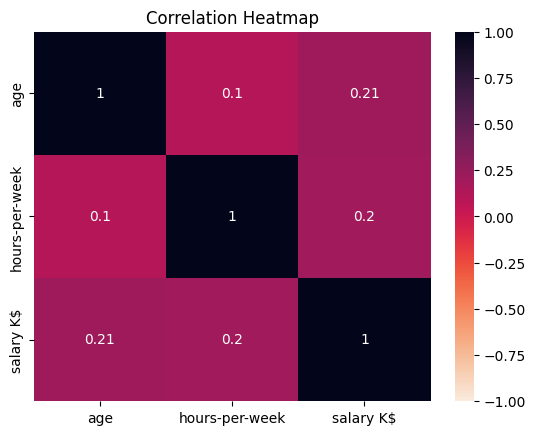

In [148]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
correlation_matrix = df[df.select_dtypes(include=['int64', 'float64']).columns].corr()
print("Correlation Matrix:")
print(correlation_matrix.to_string(float_format="%.6f"))

sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="rocket_r")
plt.title("Correlation Heatmap")
plt.show()